In [84]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Problem 2

(a)

In [90]:
def blackbox(y0,x0,xn,h,f,alpha,beta):
    n=int((xn-x0)/h)
    x=np.linspace(x0,xn,n+1)
    y=np.zeros(n+1)
    y[0]=y0
    
    m=len(alpha)-1
    #beta_sum=0
    alpha=alpha/alpha[-1]
    
    #use RK4 to compute y1...ym-1
    for i in range(m-1):
        k1 = f(x[i],y[i])
        k2 = f(x[i]+h/2, y[i]+h/2*k1)
        k3 = f(x[i]+h/2, y[i]+h/2*k2)
        k4 = f(x[i]+h, y[i]+h*k3)
        y[i+1] = y[i] + h/6*(k1+2*k2+2*k3+k4)
        
    for i in range(m,n+1):
        xk=[]
        yk=[]
        p=[]
        for j in range(m,0,-1):
            xk.append(x[i-j])
            yk.append(y[i-j])
        
        alpha_sum = np.dot(-alpha[:m],yk)
    
        for k in range(len(xk)):
            p.append(f(xk[k],yk[k]))
            
        beta_sum = h*np.dot(beta[:m], p)
        
        y[i]=alpha_sum+beta_sum
        
    return x,y

In [92]:
def f(x, y):
    return 2*y

In [93]:
def exactf(x):
    return math.e**(2*x)

In [91]:
alpha=np.array([0,-1,1])
beta=np.array([-1/2,3/2,0])

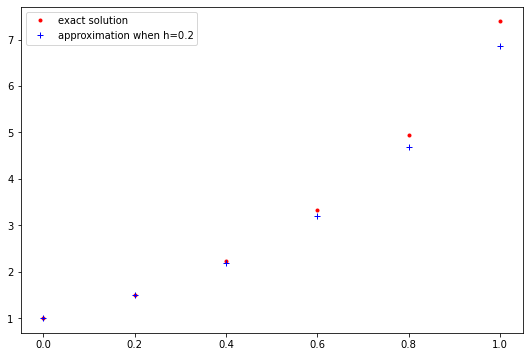

In [94]:
(x,y)=blackbox(1,0,1,0.2,f,alpha,beta)

plt.figure(figsize=(9,6))
plt.plot(x, exactf(x), '.r', label="exact solution")
plt.plot(x, y, '+b', label='approximation when h=0.2')
plt.legend()
plt.show()

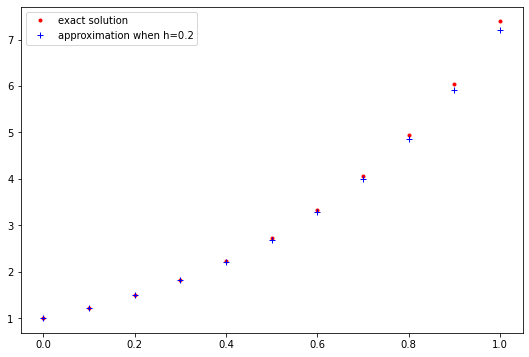

In [95]:
(x,y)=blackbox(1,0,1,0.1,f,alpha,beta)

plt.figure(figsize=(9,6))
plt.plot(x, exactf(x), '.r', label="exact solution")
plt.plot(x, y, '+b', label='approximation when h=0.2')
plt.legend()
plt.show()

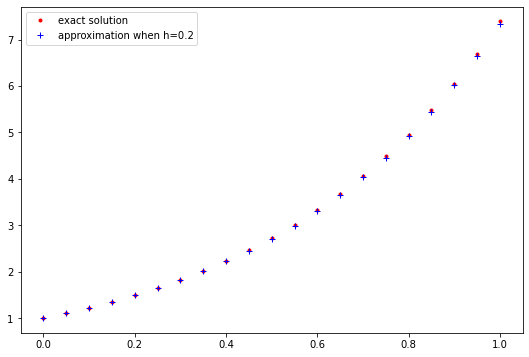

In [97]:
(x,y)=blackbox(1,0,1,0.05,f,alpha,beta)

plt.figure(figsize=(9,6))
plt.plot(x, exactf(x), '.r', label="exact solution")
plt.plot(x, y, '+b', label='approximation when h=0.2')
plt.legend()
plt.show()

(b)

In [22]:
def exactf_b(x):
    return x+1-0.5*math.e**x

In [23]:
def f_b(x, y):
    return y-x
    

In [98]:
alpha=np.array([-1,0,1])
beta=np.array([0,2,0])

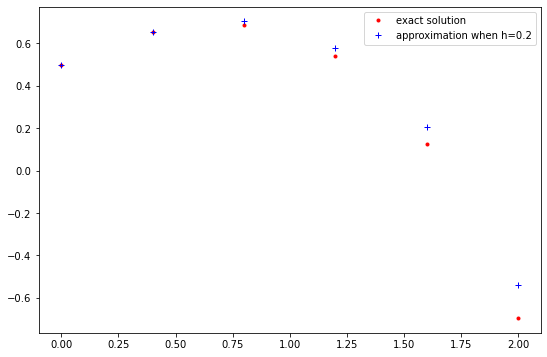

In [99]:
(x,y)=blackbox(1/2,0,2,0.4,f_b,alpha,beta)

plt.figure(figsize=(9,6))
plt.plot(x, exactf_b(x), '.r', label="exact solution")
plt.plot(x, y, '+b', label='approximation when h=0.2')
plt.legend()
plt.show()

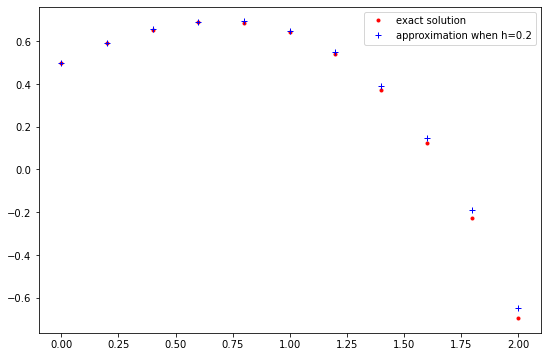

In [100]:
(x,y)=blackbox(1/2,0,2,0.2,f_b,alpha,beta)

plt.figure(figsize=(9,6))
plt.plot(x, exactf_b(x), '.r', label="exact solution")
plt.plot(x, y, '+b', label='approximation when h=0.2')
plt.legend()
plt.show()

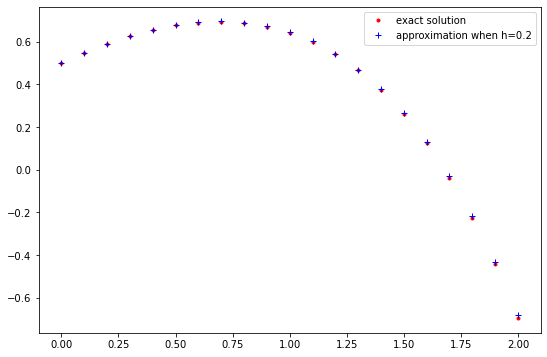

In [101]:
(x,y)=blackbox(1/2,0,2,0.1,f_b,alpha,beta)

plt.figure(figsize=(9,6))
plt.plot(x, exactf_b(x), '.r', label="exact solution")
plt.plot(x, y, '+b', label='approximation when h=0.2')
plt.legend()
plt.show()

(c)

(i)

 $y'(x)=5y(x)(1-y(x))$ on $[-1,3]$, and $y(-1)=0.3$
 
 exact solution is $y(x)=1-\frac{1}{1+Ke^{5x}}$ with $K=\frac{3}{7}e^5$
 
 Forward Euler: $y_{k+1}=y_k+hf(x_k,y_k)$
 
 AB4: $y_{k+4}=y_{k+3}+\frac{h}{24}(55f_{k+3}-59f_{k+2}+37f_{k+1}-9f_k)$

In [102]:
def exactf_c(x):
    K = 3/7*math.e**5
    return 1 - 1/(1+K*math.e**(5*x))

In [103]:
def f_c(x, y):
    return 5*y*(1-y)

In [104]:
alpha_forward=np.array([-1,1])
beta_forward=np.array([1,0])
alpha_ab4=np.array([0,0,0,-1,1])
beta_ab4=np.array([-9/24,37/24,-59/24,55/24,0])

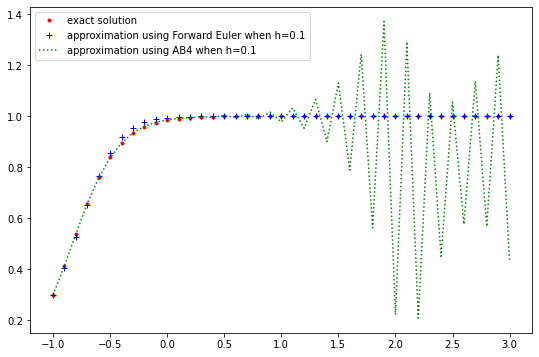

In [107]:
(x,y_forward)=blackbox(0.3,-1,3,0.1,f_c,alpha_forward,beta_forward)
(x,y_ab4)=blackbox(0.3,-1,3,0.1,f_c, alpha_ab4,beta_ab4)

plt.figure(figsize=(9,6))
plt.plot(x, exactf_c(x), '.r', label="exact solution")
plt.plot(x, y_forward, '+b', label='approximation using Forward Euler when h=0.1')
plt.plot(x, y_ab4, ':g', label='approximation using AB4 when h=0.1')
plt.legend()
plt.show()

#### Forward Euler is accurate from -1 to 3 and AB4 is accurate from -1 to 1.

(ii)

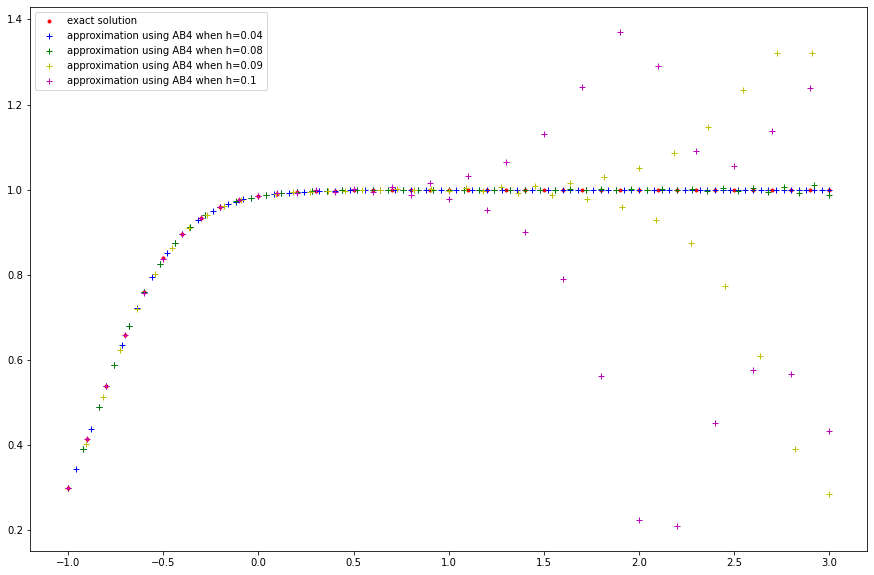

In [108]:
(x1,y1)=blackbox(0.3,-1,3,0.04,f_c,alpha_ab4,beta_ab4)
(x2,y2)=blackbox(0.3,-1,3,0.08,f_c,alpha_ab4,beta_ab4)
(x3,y3)=blackbox(0.3,-1,3,0.09,f_c,alpha_ab4,beta_ab4)
(x4,y4)=blackbox(0.3,-1,3,0.1,f_c,alpha_ab4,beta_ab4)

plt.figure(figsize=(15,10))
plt.plot(x4, exactf_c(x4), '.r', label="exact solution")
plt.plot(x1, y1, '+b', label='approximation using AB4 when h=0.04')
plt.plot(x2, y2, '+g', label='approximation using AB4 when h=0.08')
plt.plot(x3, y3, '+y', label='approximation using AB4 when h=0.09')
plt.plot(x4, y4, '+m', label='approximation using AB4 when h=0.1')
plt.legend()
plt.show()

(iii)

In [109]:
def RK4(y0,a,b,h,f):
    n = int((b-a)/h)
    x = np.linspace(a,b,n+1)
    y = np.zeros(n+1)
    y[0]=y0
    
    for i in range(n):
        k1 = f(x[i],y[i])
        k2 = f(x[i]+h/2, y[i]+h/2*k1)
        k3 = f(x[i]+h/2, y[i]+h/2*k2)
        k4 = f(x[i]+h, y[i]+h*k3)
        y[i+1] = y[i] + h/6*(k1+2*k2+2*k3+k4)
        
    return x,y

In [110]:
alpha_ab2=np.array([0,-1,1])
beta_ab2=np.array([-1/2,3/2,0])

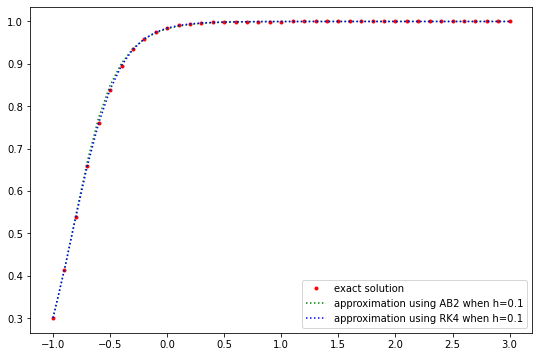

In [112]:
(x_ab2,y_ab2)=blackbox(0.3,-1,3,0.1,f_c,alpha_ab2,beta_ab2)
(x_rk4,y_rk4)=RK4(0.3,-1,3,0.1,f_c)

plt.figure(figsize=(9,6))
plt.plot(x_ab2, exactf_c(x_ab2), '.r', label="exact solution")
plt.plot(x_ab2, y_ab2, ':g', label='approximation using AB2 when h=0.1')
plt.plot(x_rk4, y_rk4, ':b', label='approximation using RK4 when h=0.1')
plt.legend()
plt.show()

(iv)

In [113]:
(x_forward,y_forward)=blackbox(0.3,-1,3,0.05,f_c,alpha_forward,beta_forward)
(x_ab4,y_ab4)=blackbox(0.3,-1,3,0.05,f_c,alpha_ab4,beta_ab4)
(x_ab2,y_ab2)=blackbox(0.3,-1,3,0.1,f_c,alpha_ab2,beta_ab2)
(x_rk4,y_rk4)=RK4(0.3,-1,3,0.2,f_c)

In [114]:
err_euler=abs(exactf_c(3)-y_forward[-1])
err_ab4=abs(exactf_c(3)-y_ab4[-1])
err_ab2=abs(exactf_c(3)-y_ab2[-1])
err_rk4=abs(exactf_c(3)-y_rk4[-1])

In [115]:
method=np.array(['Euler','AB2','AB4','RK4'])
err=np.array([err_euler,err_ab4,err_ab2,err_rk4])
info = {'method': method, 'error': err}
print(tabulate(info, headers='keys'))

method          error
--------  -----------
Euler     4.46592e-09
AB2       1.36243e-10
AB4       2.19652e-08
RK4       1.82796e-09


(d)

In [116]:
def f_d(x,y):
    return 0

alpha_explicit=np.array([-5,4,1])
beta_explicit=np.array([2,4,0])

In [117]:
def modified_black_box(y0,x0,xn,h,fxy,alpha,beta):
    n=int((xn-x0)/h)
    x=np.linspace(x0,xn,n+1)
    y=np.zeros(n+1)
    y[0]=y0
    
    m=len(alpha)-1
    beta_sum=0
    alpha=alpha/alpha[-1]
    
    y[1]=1+1.e-10
        
    for i in range(m,n+1):
        xk=[]
        yk=[]
        f=[]
        for j in range(m,0,-1):
            xk.append(x[i-j])
            yk.append(y[i-j])
        
        alpha_sum = np.dot(-alpha[:m],yk)
    
        for k in range(len(xk)):
            f.append(fxy(xk[k],yk[k]))
            
        beta_sum = h*np.dot(beta[:m], f)
        
        y[i]=alpha_sum+beta_sum
        
    return x,y

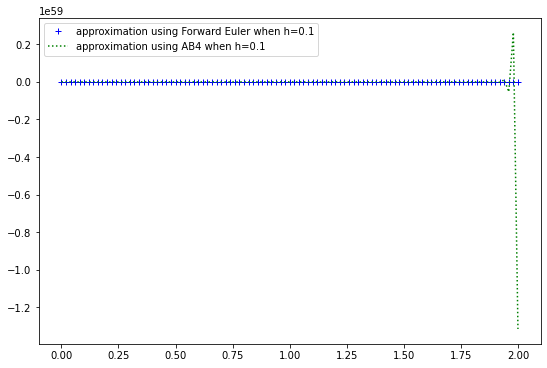

In [119]:
(x_explicit,y_explicit)=blackbox(1,0,2,0.02,f_d,alpha_explicit,beta_explicit)
(x_modified,y_modified)=modified_black_box(1,0,2,0.02,f_d,alpha_explicit,beta_explicit)

plt.figure(figsize=(9,6))
plt.plot(x_explicit, y_explicit, '+b', label='approximation using Forward Euler when h=0.1')
plt.plot(x_modified, y_modified, ':g', label='approximation using AB4 when h=0.1')
plt.legend()
plt.show()

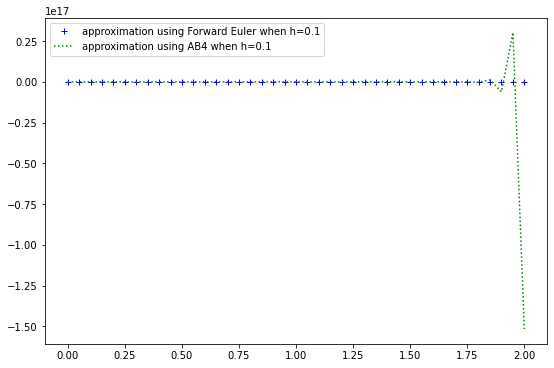

In [120]:
(x_explicit,y_explicit)=blackbox(1,0,2,0.05,f_d,alpha_explicit,beta_explicit)
(x_modified,y_modified)=modified_black_box(1,0,2,0.05,f_d,alpha_explicit,beta_explicit)

plt.figure(figsize=(9,6))
plt.plot(x_explicit, y_explicit, '+b', label='approximation using Forward Euler when h=0.1')
plt.plot(x_modified, y_modified, ':g', label='approximation using AB4 when h=0.1')
plt.legend()
plt.show()

Problem 3

In [87]:
def plotS(R, regions = [-2, 2, -2, 2]):
    xa, xb, ya, yb = regions
    x = linspace(xa,xb,501)
    y = linspace(ya,yb,501)
    X,Y = meshgrid(x,y)
    Z = X + 1j*Y
    Rabs = abs(R(Z))
    levels = [-1e9,1,1e9]
    Sregion_color = [0.8, 0.8, 1.]   # RGB 
    contourf(X,Y,Rabs,levels,colors=[Sregion_color,'w'])
    contour(X,Y,Rabs,[1],colors='k') # boundary
    
    # plot axes
    plot([xa, xb], [0, 0], 'k')
    plot([0, 0], [ya, yb], 'k')
    axis(regions)
    axis('scaled')  # so circles are circular

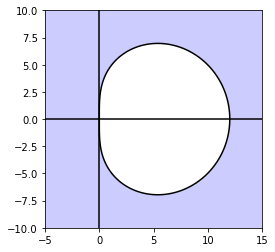

In [89]:
np.seterr(all='ignore')
R = lambda z: (1+(5/12*z))/(1-7/12*z+1/12*z**2)
regions = [-5,15,-10,10]
plotS(R, regions)

In [81]:
del axis